In [259]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/a3426/Desktop/인지개/7_week/PAMAP_features.csv",index_col=0)

#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [261]:
df['act_level'].value_counts()

act_level
1    5283
0    5124
2    1366
Name: count, dtype: int64

In [262]:
df['sub_id'].value_counts()

sub_id
4    1651
1    1618
7    1576
5    1556
0    1518
6    1430
3    1353
2    1042
8      29
Name: count, dtype: int64

In [263]:
df['activity_id'].value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

In [311]:
df.columns

Index(['sub_id', 'activity_id', 'act_level', 'hr_mean', 'hr_mean_normal',
       'hr_std', 'hr_std_normal', 'hand_tmp_mean', 'hand_tmp_std',
       'hand_acc_x_mean', 'hand_acc_x_std', 'hand_acc_y_mean',
       'hand_acc_y_std', 'hand_acc_z_mean', 'hand_acc_z_std',
       'hand_gyr_x_mean', 'hand_gyr_x_std', 'hand_gyr_y_mean',
       'hand_gyr_y_std', 'hand_gyr_z_mean', 'hand_gyr_z_std', 'chest_tmp_mean',
       'chest_tmp_std', 'chest_acc_x_mean', 'chest_acc_x_std',
       'chest_acc_y_mean', 'chest_acc_y_std', 'chest_acc_z_mean',
       'chest_acc_z_std', 'chest_gyr_x_mean', 'chest_gyr_x_std',
       'chest_gyr_y_mean', 'chest_gyr_y_std', 'chest_gyr_z_mean',
       'chest_gyr_z_std', 'ankle_tmp_mean', 'ankle_tmp_std',
       'ankle_acc_x_mean', 'ankle_acc_x_std', 'ankle_acc_y_mean',
       'ankle_acc_y_std', 'ankle_acc_z_mean', 'ankle_acc_z_std',
       'ankle_gyr_x_mean', 'ankle_gyr_x_std', 'ankle_gyr_y_mean',
       'ankle_gyr_y_std', 'ankle_gyr_z_mean', 'ankle_gyr_z_std',
       '

Text(0.5, 1.0, 'act_level')

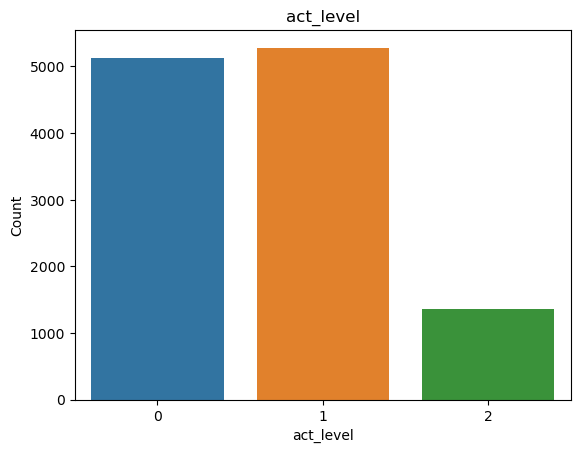

In [312]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='act_level')
plt.ylabel("Count")
plt.title('act_level')

Text(0.5, 1.0, 'activity_id')

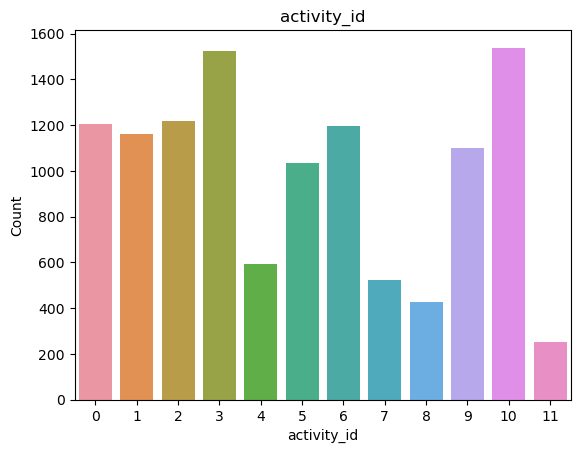

In [313]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='activity_id')
plt.ylabel("Count")
plt.title('activity_id')

Text(0.5, 1.0, 'sub_id')

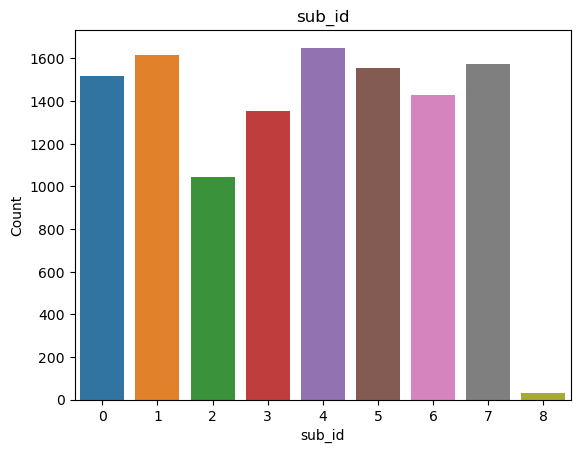

In [314]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x='sub_id')
plt.ylabel("Count")
plt.title('sub_id')

In [315]:
# 레이블 갯수 확인 (숫자)
df['act_level'].value_counts()

act_level
1    5283
0    5124
2    1366
Name: count, dtype: int64

In [316]:
y=df['act_level']
y.value_counts()

act_level
1    5283
0    5124
2    1366
Name: count, dtype: int64

In [317]:
X=df.drop(['sub_id', 'act_level'], axis=1)
X.head()

,activity_id,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,10,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,3,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,4,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,10,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,2,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [320]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [321]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test,pred_nn))


--- SVM Classifier ---
0.94226
[[1237   13    0]
 [  17 1316    9]
 [   0  131  221]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00       352

    accuracy                           1.00      2944
   macro avg       1.00      1.00      1.00      2944
weighted avg       1.00      1.00      1.00      2944



In [322]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
0.99932
[[1249    1    0]
 [   0 1341    1]
 [   0    0  352]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00       352

    accuracy                           1.00      2944
   macro avg       1.00      1.00      1.00      2944
weighted avg       1.00      1.00      1.00      2944



In [323]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_nn))


--- Decision Tree Classifier ---
0.99457
[[1247    3    0]
 [   2 1337    3]
 [   0    8  344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1342
           2       1.00      1.00      1.00       352

    accuracy                           1.00      2944
   macro avg       1.00      1.00      1.00      2944
weighted avg       1.00      1.00      1.00      2944



In [324]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9989809782608695
[[1250    0    0]
 [   1 1341    0]
 [   0    2  350]]


딥러닝


In [325]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

#LabelEncoder를 적용하여 변환
df['sub_id'] = label.fit_transform(df['sub_id'])
df['activity_id'] = label.fit_transform(df['activity_id'])
df['act_level'] = label.fit_transform(df['act_level'])

df

,sub_id,activity_id,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,1,10,0,87.000000,1.175676,0.000000,7.105427e-15,34.375000,0.000000,-1.165524,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,3,1,124.605469,1.683858,0.927920,1.253946e-02,31.875000,0.000000,-12.040995,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,6,4,2,113.493430,1.891557,2.315888,3.859813e-02,32.500000,0.000000,-3.723040,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,6,10,0,82.513672,1.375228,0.492657,8.210948e-03,33.812500,0.000000,-3.618932,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,7,2,0,73.000000,1.106061,0.000000,7.327472e-15,34.437500,0.000000,-9.275877,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10708,5,1,0,82.582031,1.376367,0.930285,1.550475e-02,33.525635,0.030741,-4.306831,...,0.193950,-0.354026,0.175876,-0.172933,0.184131,-0.274344,-0.485489,-0.100010,-0.000800,0.031654
4870,2,1,0,76.998047,1.132324,0.806906,1.186626e-02,32.083130,0.029390,-1.545991,...,0.135629,0.056979,0.008235,0.001093,-0.203294,-0.097797,-0.273316,-0.009717,-0.076216,0.009411
11822,5,3,1,93.445312,1.557422,0.493415,8.223580e-03,31.750000,0.000000,-10.034760,...,-0.404942,0.520845,-0.951838,-0.561901,-0.169119,0.299434,-0.100683,-0.555866,-0.442849,0.063207
3866,1,6,1,129.160156,1.745408,0.361877,4.890232e-03,30.465576,0.031088,-8.275569,...,-0.136336,-0.147614,-0.344375,-0.329746,-0.024487,-0.536806,-0.161019,-0.752563,-0.627185,0.436639


In [333]:
X=df.drop(['sub_id', 'activity_id'], axis=1)
X.head()

,act_level,hr_mean,hr_mean_normal,hr_std,hr_std_normal,hand_tmp_mean,hand_tmp_std,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,...,ankle_acc_xz_cor,hand_gyr_xy_cor,hand_gyr_yz_cor,hand_gyr_xz_cor,chest_gyr_xy_cor,chest_gyr_yz_cor,chest_gyr_xz_cor,ankle_gyr_xy_cor,ankle_gyr_yz_cor,ankle_gyr_xz_cor
3006,0,87.000000,1.175676,0.000000,7.105427e-15,34.3750,0.0,-1.165524,2.383779,3.381285,...,0.233251,-0.472662,0.335516,-0.377507,-0.290138,-0.779952,0.071855,-0.305959,-0.003001,-0.638866
3497,1,124.605469,1.683858,0.927920,1.253946e-02,31.8750,0.0,-12.040995,3.734766,3.069947,...,-0.119772,-0.287380,-0.230390,-0.491314,0.011124,-0.799319,-0.135736,-0.653133,-0.654575,0.391363
14495,2,113.493430,1.891557,2.315888,3.859813e-02,32.5000,0.0,-3.723040,10.188184,11.705779,...,0.025673,-0.265566,0.824691,-0.121345,-0.004923,-0.317761,-0.202148,-0.660278,-0.528138,0.402147
13278,0,82.513672,1.375228,0.492657,8.210948e-03,33.8125,0.0,-3.618932,1.935690,0.542981,...,0.724061,-0.196728,0.315984,-0.380337,0.284190,-0.109078,-0.071734,-0.177813,0.237828,-0.729771
14969,0,73.000000,1.106061,0.000000,7.327472e-15,34.4375,0.0,-9.275877,0.082824,1.006239,...,-0.001651,-0.060776,0.165672,0.311760,-0.272620,-0.014943,-0.191610,-0.261158,0.066954,0.057685


In [334]:
y=new_df['activity_id']
y.value_counts()

activity_id
10    1539
3     1525
2     1220
0     1203
6     1196
1     1162
9     1099
5     1035
4      593
7      522
8      428
11     251
Name: count, dtype: int64

In [335]:
y.head()

3006     10
3497      3
14495     4
13278    10
14969     2
Name: activity_id, dtype: int64

In [336]:
Y = pd.get_dummies(y).values

In [337]:
X = X.values

In [338]:
X

array([[ 0.00000000e+00,  8.70000000e+01,  1.17567568e+00, ...,
        -3.05958745e-01, -3.00077749e-03, -6.38866238e-01],
       [ 1.00000000e+00,  1.24605469e+02,  1.68385769e+00, ...,
        -6.53133351e-01, -6.54575222e-01,  3.91363415e-01],
       [ 2.00000000e+00,  1.13493430e+02,  1.89155717e+00, ...,
        -6.60278246e-01, -5.28137910e-01,  4.02146741e-01],
       ...,
       [ 1.00000000e+00,  9.34453125e+01,  1.55742187e+00, ...,
        -5.55865799e-01, -4.42848703e-01,  6.32073012e-02],
       [ 1.00000000e+00,  1.29160156e+02,  1.74540752e+00, ...,
        -7.52563011e-01, -6.27184592e-01,  4.36639097e-01],
       [ 1.00000000e+00,  1.42234375e+02,  1.92208615e+00, ...,
        -1.64102644e-02, -6.62742491e-01, -8.59535039e-02]])

In [339]:
y

3006     10
3497      3
14495     4
13278    10
14969     2
         ..
10708     1
4870      1
11822     3
3866      6
3450      8
Name: activity_id, Length: 11773, dtype: int64

In [340]:
Y

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [341]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [342]:
X_train.shape ,X_test.shape, y_train.shape ,y_test.shape 

((9418, 65), (2355, 65), (9418, 12), (2355, 12))

In [343]:
X_train.shape[1]

65

In [346]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
import tensorflow as tf

model = Sequential()

model.add(Dense(30,input_shape=(X_train.shape[1],),activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(12,activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 30)                  │           1,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 12)                  │             252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,852 (11.14 KB)

 Trainable params: 2,852 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

In [351]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9971 - loss: 0.0024 - val_accuracy: 0.9975 - val_loss: 0.0030
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9974 - loss: 0.0023 - val_accuracy: 0.9928 - val_loss: 0.0042
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9971 - loss: 0.0020 - val_accuracy: 0.9962 - val_loss: 0.0029
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9966 - loss: 0.0025 - val_accuracy: 0.9962 - val_loss: 0.0031
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9967 - loss: 0.0025 - val_accuracy: 0.9966 - val_loss: 0.0028
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0015 - val_accuracy: 0.9962 - val_loss: 0.0029
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9980 - loss: 0.0019 - val_accuracy: 0.9975 - val_loss: 0.0025
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0023 - val_accuracy: 0.

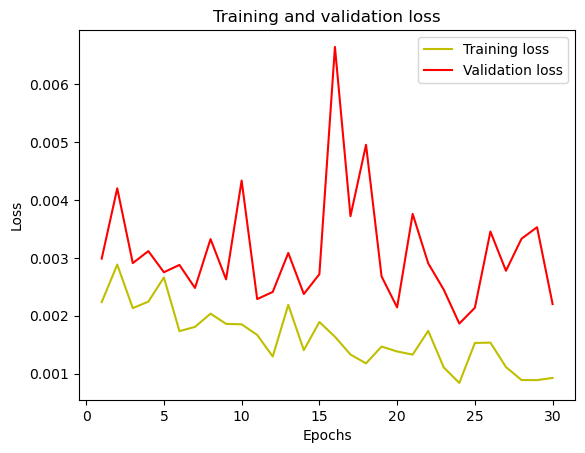

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

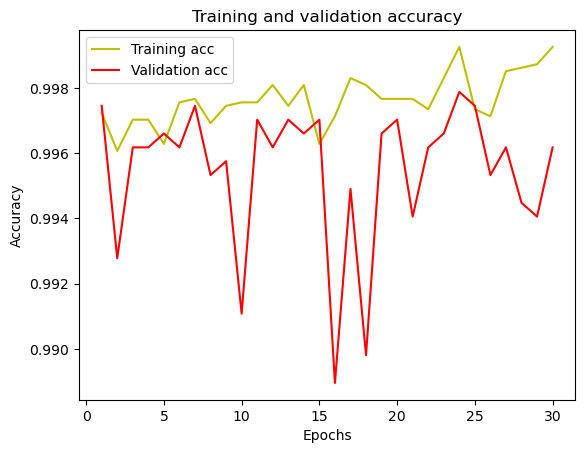

In [353]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [354]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      0.99      0.99       236
           2       0.99      0.99      0.99       236
           3       1.00      1.00      1.00       282
           4       1.00      0.98      0.99       122
           5       1.00      1.00      1.00       222
           6       1.00      1.00      1.00       242
           7       1.00      1.00      1.00       115
           8       1.00      1.00      1.00        86
           9       1.00      1.00      1.00       234
          10       0.99      0.99      0.99       284
          11       0.96      1.00      0.98        49

    accuracy                           1.00      2355
   macro avg       0.99      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355

[[247   0   0   0   0   0   0   0   0   0   0   0]
 [  0 233   1   0   0   0   0   0   0   0   2   0]
 [  0   0 234   0   0   0   0  